# 1. Prepare the Data Set


In [55]:
# Make the necessary imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import decomposition

from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/modified_data (3).csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
data.shape

(1460, 77)

In [ ]:
data.drop('Id',inplace=True,axis=1)

In [ ]:
data.sample()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
930,20,RL,73.0,8925,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,201000


In [ ]:
len(data.columns)

76

# 2. Fill in Missing Values


In [ ]:
features_with_missing= list(data.columns[data.isna().any()])
features_with_missing

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
#drops data that is 50% missing
data.dropna(axis=1,thresh=0.5*(len(data)),inplace=True)

In [ ]:
len(features_with_missing)

15

In [ ]:
mean_fill = ['LotFrontage','MasVnrArea']
bfill= ['FireplaceQu']
ffill = list(set(features_with_missing)-set(mean_fill)-set(bfill))

In [ ]:
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(),inplace=True)

In [ ]:
for feature in bfill:
  data[feature].fillna(method = 'bfill',inplace = True)

In [ ]:
for feature in ffill:
  data[feature].fillna(method = 'ffill',inplace = True)

In [ ]:
data.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

# 3. Encode the Dataset


In [ ]:
original_features =list(data.columns)

In [ ]:
categorical_data = list(data.select_dtypes(include=['object']).columns)
categorical_data

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
nominal =['MSZoning','LandContour','LotConfig','Neighborhood']
ordinal = list(set(categorical_data)-set(nominal))
numerical = list(set(original_features)-set(categorical_data))
target= ['SalePrice']

In [ ]:
data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
#Integer encoding
for feature in ordinal:
  data[feature]=(data[feature].astype('category')).cat.codes

In [ ]:
# One hot encoding
df_nominal= pd.get_dummies(data[nominal])
df_nominal.sample()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
1015,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_ordinal = data[ordinal]
df_numerical = data[numerical]

In [ ]:
encoded_data= pd.concat([df_nominal,df_numerical,df_ordinal],axis=1)
encoded_data.sample()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,...,Functional,Exterior1st,Electrical,ExterCond,HeatingQC,BsmtFinType2,BldgType,PavedDrive,RoofStyle,KitchenQual
1282,0,0,0,1,0,0,0,0,1,0,...,6,6,4,4,4,4,0,2,1,2


# 4. Standardize the Dataset


In [58]:
#Data Normalization - numbers are made to be between 0 and 1

In [59]:
X= encoded_data.drop('SalePrice',axis = 1)

In [60]:
y = data[target]

In [61]:
#Standardize y
y= StandardScaler().fit_transform(y)

# 6. Perform Feature selection using L1 

In [ ]:
regressor=LassoCV()
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [ ]:
coef_col = (regressor.coef_)
selected_features =(X.columns[(coef_col != 0)])
selected_features

Index(['MasVnrArea', 'BsmtFinSF1', 'LotArea', 'YearBuilt', 'MiscVal',
       'GarageArea', 'TotalBsmtSF', 'GrLivArea', 'YearRemodAdd', 'WoodDeckSF',
       '2ndFlrSF'],
      dtype='object')

After perfomring Lasso Regularization on the data, L1 selected 11 features that will be used for modelling


In [ ]:
rejected_features =  X.columns[(coef_col == 0)]
rejected_features

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', '1stFlrSF', 'LowQualFinSF', 'GarageCars',
       'OpenPorchSF', 'Yr

In [ ]:
#Drop rejected features.
#Standardize new features.
new_X = encoded_data.drop(rejected_features, axis=1)
new_X = StandardScaler().fit_transform(new_X)

# 7. Train a regression model using PCA with 2 compnents



In [ ]:
#define predictor and response variables
X = data[['BsmtFinSF1', 'LotArea']]
y = data[['SalePrice']]

In [ ]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [ ]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

In [ ]:
# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

In [ ]:
# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'SalePrice')

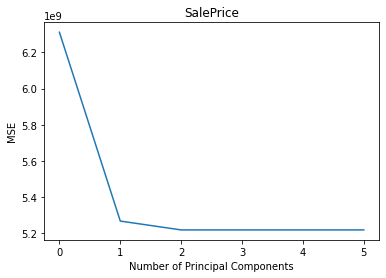

In [ ]:
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('SalePrice')

Test on 30% of the data 


In [ ]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

In [ ]:
#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

LinearRegression()

In [ ]:
#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

75313.7878510948